In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
from pathlib import Path
from glob import glob

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch import optim

In [4]:
from data_loader import DatasetLoader
from custom_data import PrivacyDataset

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
annotation_path='data/val/val_annotations'
img_path='data/val/val_images'

In [7]:
loader = DatasetLoader()
loaded_data = loader.load_data(annotation_path)

In [8]:
train_size=round(len(loaded_data) * 0.8)
val_size=round(len(loaded_data) * 0.2)
train_size + val_size

4167

In [9]:
transform = transforms.Compose([transforms.ToPILImage(),
                                transforms.Resize(255),
                                transforms.CenterCrop(244),
                                transforms.ToTensor()])

In [10]:
dataset=PrivacyDataset(path=img_path,loaded_data=loaded_data,transform=transform)

In [11]:
train_set, val_set = torch.utils.data.random_split(dataset,[train_size,val_size])

In [12]:
train_loader=DataLoader(dataset=train_set,batch_size=32,shuffle=True)
val_loader=DataLoader(dataset=val_set,batch_size=32,shuffle=True)

In [19]:
img, label = next(iter(train_loader))

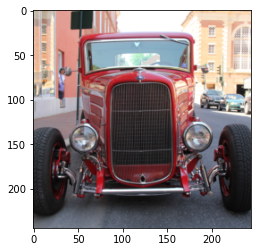

In [20]:
plt.imshow(img[0].permute(1, 2, 0)) # requires channel dimension to be indexed last

In [21]:
label[0]

tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
attr=loader.get_attr()

In [23]:
attr

Index(['a0_safe', 'a17_color', 'a6_hair_color', 'a16_race', 'a1_age_approx',
       'a24_birth_date', 'a29_ausweis', 'a2_weight_approx', 'a3_height_approx',
       'a4_gender', 'a5_eye_color', 'a78_address_home_complete',
       'a82_date_time', 'a9_face_complete', 'a18_ethnic_clothing',
       'a55_religion', 'a65_rel_social', 'a10_face_partial',
       'a61_opinion_general', 'a69_rel_views', 'a12_semi_nudity',
       'a64_rel_personal', 'a48_occassion_work', 'a66_rel_professional',
       'a60_occassion_personal', 'a46_occupation', 'a73_landmark',
       'a19_name_full', 'a25_nationality', 'a74_address_current_complete',
       'a8_signature', 'a41_injury', 'a103_license_plate_complete',
       'a26_handwriting', 'a75_address_current_partial', 'a49_phone',
       'a37_receipt', 'a70_education_history', 'a57_culture',
       'a68_rel_spectators', 'a23_birth_city', 'a99_legal_involvement',
       'a59_sports', 'a67_rel_competitors', 'a39_disability_physical',
       'a43_medicine', 'a1